<a href="https://colab.research.google.com/github/ranand345/BTpricePrediction/blob/main/BitcoinPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
25/25 [==============================] - 3s 14ms/step - loss: 0.0021
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0072
Epoch 3/50
25/25 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 4/50
25/25 [==============================] - 0s 14ms/step - loss: 4.5588e-04
Epoch 5/50
25/25 [==============================] - 0s 14ms/step - loss: 7.9739e-05
Epoch 6/50
25/25 [==============================] - 0s 14ms/step - loss: 3.9840e-05
Epoch 7/50
25/25 [==============================] - 0s 15ms/step - loss: 3.0397e-05
Epoch 8/50
25/25 [==============================] - 0s 14ms/step - loss: 3.0145e-05
Epoch 9/50
25/25 [==============================] - 0s 13ms/step - loss: 3.0671e-05
Epoch 10/50
25/25 [==============================] - 0s 14ms/step - loss: 3.0825e-05
Epoch 11/50
25/25 [==============================] - 0s 14ms/step - loss: 3.1383e-05
Epoch 12/50
25/25 [==============================] - 0s 15ms/step - loss: 3.1615e-05
E

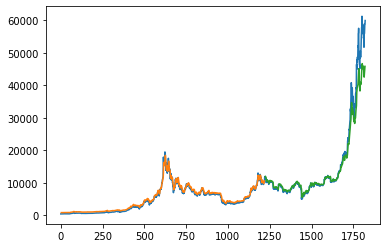

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series
url='https://raw.githubusercontent.com/ranand345/BTpricePrediction/main/Bitcoin.csv'

data=pd.read_csv(url)


data=data.set_index(pd.DatetimeIndex(data['Date']))['Close']
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

look_back=3
    

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


numpy.random.seed(0)

# loading the dataset
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)


scaler = MinMaxScaler()

dataset = scaler.fit_transform(dataset)

# splitting data into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
#look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))

model.add(LSTM(256))


model.add(Dense(1))
import keras
from keras import optimizers



model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, verbose=1,shuffle=False,batch_size=50)
# making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# inverting predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

  

     # shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
     # shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    
#     # plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

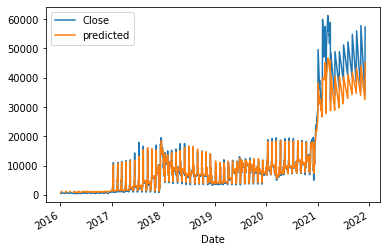

In [3]:
ans.plot()


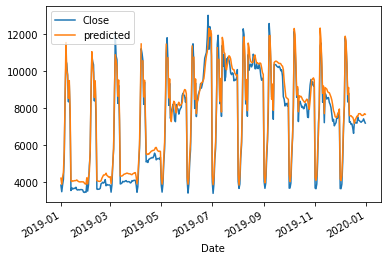

In [4]:
ans['2019'].plot()

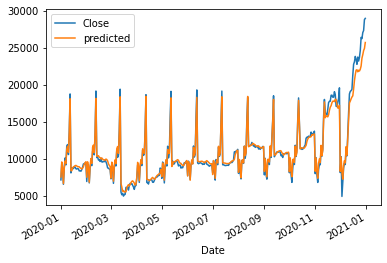

In [5]:
ans['2020'].plot()